In [2]:
import os
import pandas as pd
import rdkit
from rdkit import RDLogger
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import rdFMCS
from rdkit import DataStructs
from rdkit.Chem import PandasTools
from rdkit.Chem import Lipinski
import numpy as np
from matplotlib import pyplot as plt

In [3]:
#feat_rmsd_df = pd.read_csv('../data/rmsd_values_featurized.csv')
feat_rmsd_df = pd.read_csv('../../../Analysis_of_Docking/data/rmsd_values_featurized.csv')#../data/rmsd_values_featurized.csv')

In [4]:
feat_rmsd_df['binned_rmsd'] = None

for index, rmsd in feat_rmsd_df[['rmsd']].itertuples():
    if rmsd <= 2:
        feat_rmsd_df.at[index, 'binned_rmsd'] = 0
    else:
        feat_rmsd_df.at[index, 'binned_rmsd'] = 1

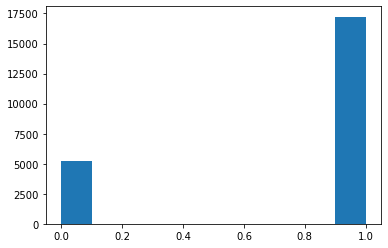

In [5]:
plt.hist(feat_rmsd_df['binned_rmsd'])
plt.show()

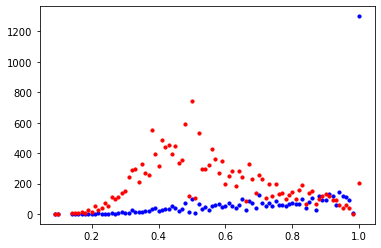

In [8]:
feat_rmsd_df['ratio'] = (feat_rmsd_df['mcs_HeavyAtomCount']) /\
                        (feat_rmsd_df['docked_HeavyAtomCount'])

feat_rmsd_df['ratio'] = [np.round(value, 2) for value in feat_rmsd_df['ratio']]

x = feat_rmsd_df['ratio'].drop_duplicates()
plt.scatter(x,
            [feat_rmsd_df.loc[(feat_rmsd_df['ratio']==c) & (feat_rmsd_df['binned_rmsd']==0)]
             ['binned_rmsd'].count() for c in x], c='blue', s=10)
plt.scatter(x,
            [feat_rmsd_df.loc[(feat_rmsd_df['ratio']==c) & (feat_rmsd_df['binned_rmsd']==1)]
             ['binned_rmsd'].count() for c in x], c='red', s=10)
plt.show()